In [1]:
# importing libraries for data manipulation and visualization
import pandas as pd

In [2]:
# importing Lebron's data for all major stats since 03
lebron_stats = pd.read_csv("lebron_career.csv",parse_dates=["date"])

In [3]:
lebron_stats.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18-306,CLE,POR,L (-19),39,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18-312,CLE,IND,L (-1),44,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


In [12]:
lebron_2016_stats = lebron_stats[(lebron_stats.date.dt.year == 2016) & (lebron_stats.date.dt.month < 7)]

In [13]:
lebron_2016_stats.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus
940,30,2016-01-02,31-003,CLE,ORL,W (+25),29,11,18,0.611,...,0,5,5,3,2,0,0,29,25.2,28
941,31,2016-01-04,31-005,CLE,TOR,W (+22),31,7,11,0.636,...,0,2,2,7,3,0,2,20,20.0,11
942,32,2016-01-06,31-007,CLE,WAS,W (+6),40,12,22,0.545,...,0,10,10,4,1,1,2,34,26.9,2
943,33,2016-01-08,31-009,CLE,MIN,W (+26),32,5,12,0.417,...,0,12,12,8,1,2,3,13,14.4,21
944,34,2016-01-10,31-011,CLE,PHI,W (+10),37,15,22,0.682,...,0,7,7,9,2,0,2,37,34.8,11


In [72]:
lbj_points = lebron_2016_stats

In [73]:
lbj_points.set_index('date',inplace=True)

<Axes: xlabel='date'>

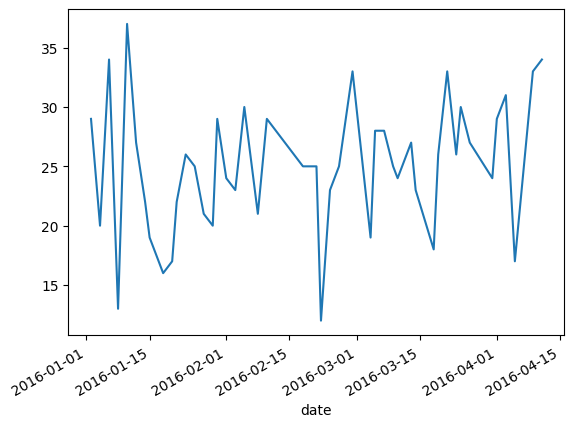

In [75]:
lbj_points["pts"].plot()

In [76]:
#importing more libraries
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

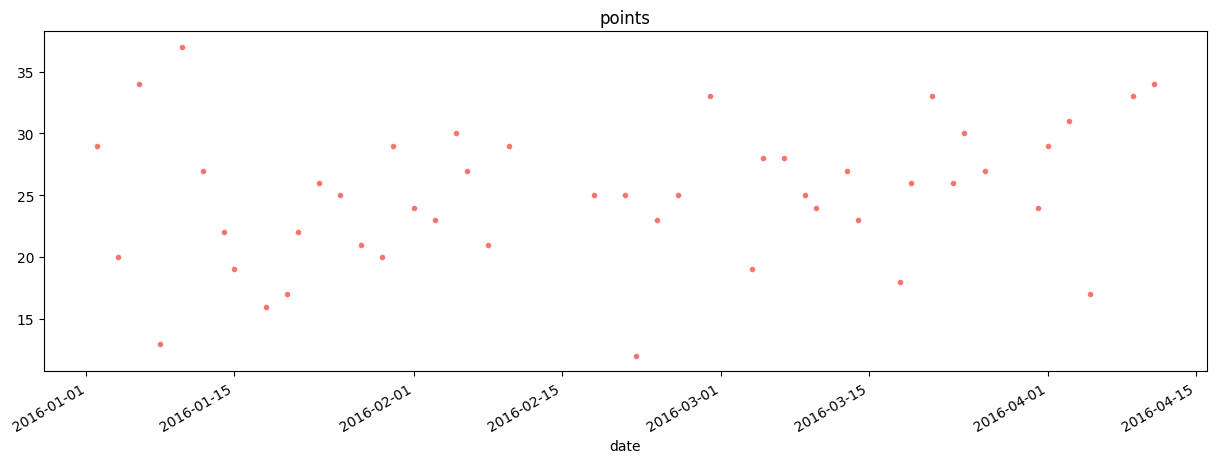

In [78]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = lbj_points["pts"].plot(style='.', figsize=(15,5), color=color_pal[0], title='points')

In [79]:
#splitting the data into train and test, split date is March 15 2016
split_date = '2016-03-15'
data_train = lbj_points.loc[lbj_points.index <= split_date].copy()
data_test = lbj_points.loc[lbj_points.index > split_date].copy()

In [80]:
data_train.head()

,game,age,team,opp,result,mp,fg,fga,fgp,three,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus
date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,30,31-003,CLE,ORL,W (+25),29,11,18,0.611,4,...,0,5,5,3,2,0,0,29,25.2,28
2016-01-04,31,31-005,CLE,TOR,W (+22),31,7,11,0.636,1,...,0,2,2,7,3,0,2,20,20.0,11
2016-01-06,32,31-007,CLE,WAS,W (+6),40,12,22,0.545,4,...,0,10,10,4,1,1,2,34,26.9,2
2016-01-08,33,31-009,CLE,MIN,W (+26),32,5,12,0.417,0,...,0,12,12,8,1,2,3,13,14.4,21
2016-01-10,34,31-011,CLE,PHI,W (+10),37,15,22,0.682,3,...,0,7,7,9,2,0,2,37,34.8,11


In [81]:
data_test.head()

,game,age,team,opp,result,mp,fg,fga,fgp,three,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus
date,,,,,,,,,,,,,,,,,,,,,
2016-03-18,65,31-079,CLE,ORL,W (+6),36,6,15,0.400,0,...,1,6,7,8,1,1,4,18,14.5,-5
2016-03-19,66,31-080,CLE,MIA,L (-21),27,13,20,0.650,0,...,0,3,3,3,1,0,3,26,17.8,-23
2016-03-21,67,31-082,CLE,DEN,W (+33),33,12,19,0.632,1,...,3,8,11,11,0,0,3,33,31.7,38
2016-03-23,68,31-084,CLE,MIL,W (+9),37,9,22,0.409,1,...,5,1,6,8,2,1,2,26,23.1,12
2016-03-24,69,31-085,CLE,BRK,L (-9),35,13,16,0.813,1,...,1,5,6,5,1,0,4,30,25.5,-8


In [90]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2016-01-02 to 2016-03-14
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   game        35 non-null     int64         
 1   age         35 non-null     object        
 2   team        35 non-null     object        
 3   opp         35 non-null     object        
 4   result      35 non-null     object        
 5   mp          35 non-null     int64         
 6   fg          35 non-null     int64         
 7   fga         35 non-null     int64         
 8   fgp         35 non-null     float64       
 9   three       35 non-null     int64         
 10  threeatt    35 non-null     int64         
 11  threep      35 non-null     float64       
 12  ft          35 non-null     int64         
 13  fta         35 non-null     int64         
 14  ftp         35 non-null     float64       
 15  orb         35 non-null     int64         
 16  drb     

In [102]:
#function to create features for data
def create_features(df, label=None):
    df['date'] = df.index
    df['fg'] = df['fg']
    df['fga'] = df['fga']
    df['mp']= df['mp']
    df['ast'] = df['ast']
    df['stl'] = df['stl']
    df['blk'] = df['blk']
    df['tov'] = df['tov']
    df['three'] = df['three']
    df['threeatt'] = df['threeatt']
    df['ft'] = df['ft']
    df['fta'] = df['fta']
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','fg','fga','mp','three','threeatt','ft','fta','stl','ast','blk','tov']]
    if label:
        y = df[label]
        return X, y
    return X

In [103]:
#Applying the function to my data
X_train, y_train = create_features(data_train, label='pts')
X_test, y_test = create_features(data_test, label='pts')
X_train.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,fg,fga,mp,three,threeatt,ft,fta,stl,ast,blk,tov
date,,,,,,,,,,,,,,,,,,
2016-01-02,0,5,1,1,2016,2,2,11,18,29,4,7,3,4,2,3,0,0
2016-01-04,0,0,1,1,2016,4,4,7,11,31,1,2,5,8,3,7,0,2
2016-01-06,0,2,1,1,2016,6,6,12,22,40,4,9,6,8,1,4,1,2
2016-01-08,0,4,1,1,2016,8,8,5,12,32,0,4,3,4,1,8,2,3
2016-01-10,0,6,1,1,2016,10,10,15,22,37,3,5,4,6,2,9,0,2


In [104]:
#importing XGBoost model
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
#instantiating model
reg = xgb.XGBRegressor(n_estimators=1000)

In [107]:
#fitting data into the model
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

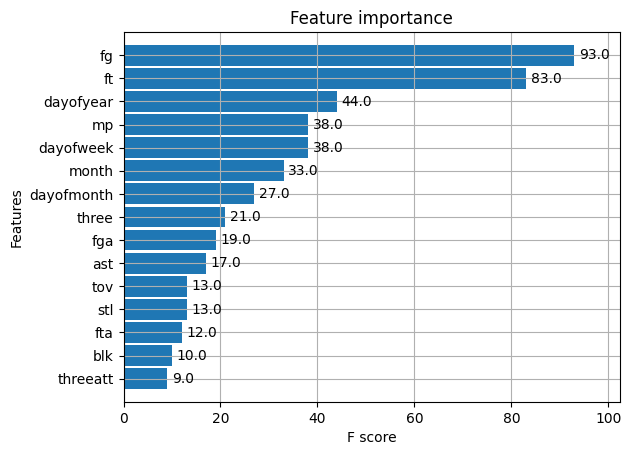

In [108]:
#checking feature important
_ = plot_importance(reg, height=0.9)

In [109]:
#making prediction and plotting it against everything else
data_test['points_Prediction'] = reg.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

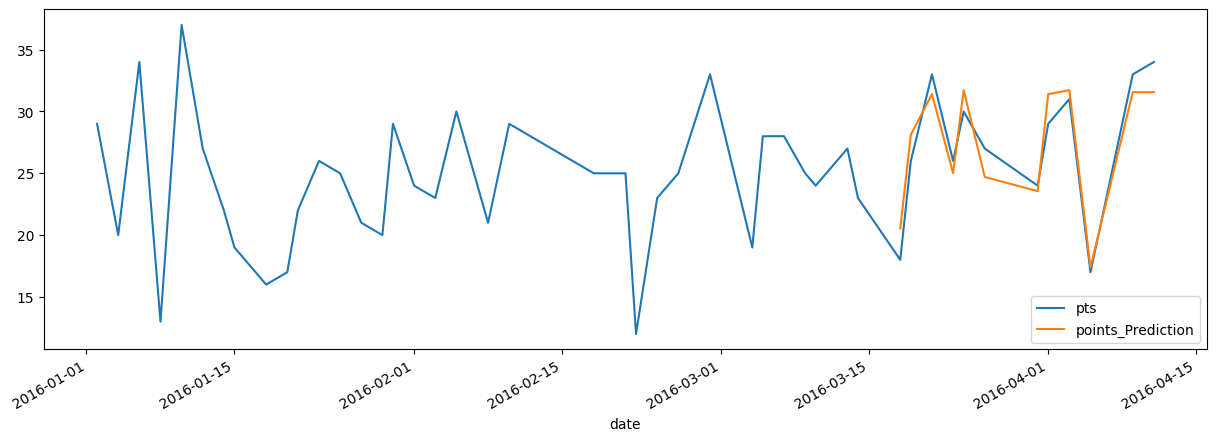

In [110]:
#prediction plot
_ = data_all[['pts','points_Prediction']].plot(figsize=(15, 5))